# Perceptron

***

## Importando bibliotecas

In [1]:
# Instalar a biblioteca caso ela não estaja instalada
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.8 MB/s eta 0:00:00a 0:00:010m


In [2]:
# Bibliotecas de manipualção e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes dos modelo
from sklearn.linear_model import Perceptron

# Funções de avaliação dos modelos
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay,
                             classification_report)

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Análise do conjunto de dados

![Iris](./imagens/iris.png)

In [3]:
#carregando o csv
dataset = pd.read_csv("https://raw.githubusercontent.com/Francimaria/especializacao_DNN/main/datasets/Iris.csv")

# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

### Separando o conjunto de dados

In [4]:
#Vamos usar somente duas features PetalLengthCm e PetalWidthCm
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

# para treinar e avaliar um classificador, precisamos dividir o dataset em dois conjuntos, ...
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

## Treinamento do modelo 

**Perceptron**: o perceptron é um algoritmo para aprendizagem supervisionada de classificação binária



- Para problemas multi-class no sklearn:
Ajuste de um classificador multiclasse é realizada através da combinação de classificadores binários, cada classificador binário prevê uma classe versus todas as outras. Essa estratégia é chamada OvA (One versus All) ou OvR (One versus Rest).*


![OvR](./imagens/OvR.png)



In [5]:
# ... referenciando o modelo
model = Perceptron()

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

In [6]:
# qual o resultado para esse classificador?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        12
           1       0.00      0.00      0.00        13
           2       0.65      1.00      0.79        13

    accuracy                           0.66        38
   macro avg       0.44      0.67      0.53        38
weighted avg       0.43      0.66      0.52        38



[[1.         0.         0.        ]
 [0.46153846 0.         0.53846154]
 [0.         0.         1.        ]]

 Labels:[0 1 2] 



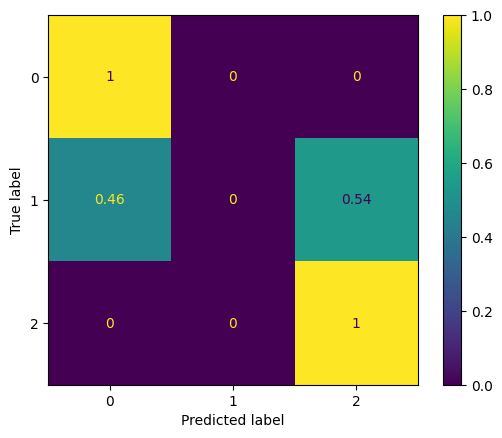

In [7]:
# a função confusion matrix retorna uma matriz com a contagem de como cada 
# uma das classes está sendo classificada corretamente ou erroneamente
cm = confusion_matrix(y_test, y_pred, labels=model.classes_, normalize="true")
print(cm)

print(f"\n Labels:{model.classes_} \n")

#display_labels - define como será a ordem das classes na matriz
disp_cm = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp_cm.plot()


In [8]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

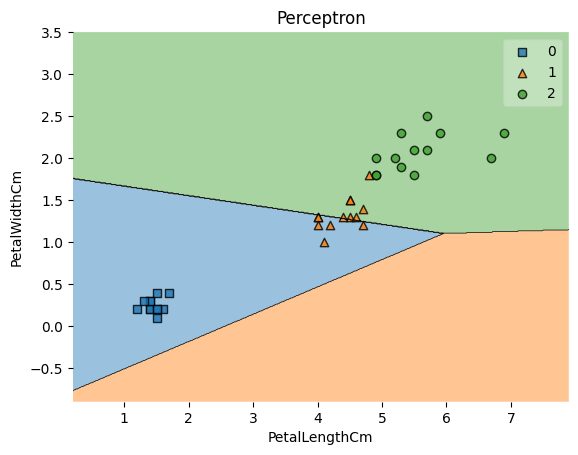

In [9]:
show_decision_region(X_test, y_test, model)

## O perceptron possui alguns parâmetros que podem ser ajustados 

Verifique a documentação disponível em [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) e ajuste o modelo para este problema

Como ajustar o perceptron? 